# Classificação de imagem com rede neural artificial

In [94]:
import cv2
import numpy as np
import os 
import tensorflow as tf # Deep Learning
import pandas as pd # Manipulação de dados
import seaborn as sns # Visualização de dados
import matplotlib.pyplot as plt # Visualização de dados
import PIL # Manipulação de imagens
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import save_model
tf.__version__

'2.12.0'

- Definindo caminho das imagens na variável arquivos

In [95]:
diretorio = "./data/homer_bart_1"
arquivos = [os.path.join(diretorio, arquivo) for arquivo in sorted(os.listdir(diretorio))]

- Precisamos definir o tamanho das imagens único para todas 128x128

In [96]:
largura, altura = 128, 128

- Variável imagens para armazenar as imagens em formato de array
- Variável classes para armazenar as classes das imagens 0 -> Homer, 1 -> Bart

In [97]:
imagens = []
classes = []

- Extração dos pixels das imagens

- Nesse bloco de código, estamos lendo as imagens, ajustando o seu tamanho, convertendo para escala de cinza, convertendo para array e adicionando na variável imagens.
- No finalzinho estamos pegando o nome referente a identificação da imagem e adicionando na variável classes para identificar a classe da imagem.

In [98]:
for arquivo in arquivos:
    try:
        imagem = cv2.imread(arquivo)
        (H, W) = imagem.shape[:2] # Altura e largura da imagem
    except:
        continue
    imagem = cv2.resize(imagem, (largura, altura)) # Redimensiona a imagem
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # Converte a imagem para tons de cinza
    imagem = imagem.ravel() # Converte a imagem para um vetor
    imagens.append(imagem) # Adiciona a imagem na lista de imagens
    nome_imagem = arquivo.split(os.path.sep)[-1] # Pega o nome da imagem
    if "homer" in nome_imagem:
        classes.append(0)
    else:
        classes.append(1)            

- Convertendo as imagens em array e suas respectivas classes em array numpy

In [99]:
X = np.array(imagens)
y = np.array(classes)

In [100]:
X.shape, y.shape

((269, 16384), (269,))

- Plot da quantidade de imagens por classe

<Axes: ylabel='count'>

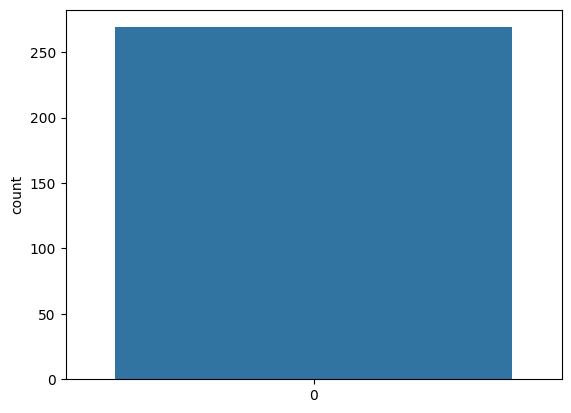

In [101]:
sns.countplot(y)

- Normalização dos dados

In [102]:
X[0].max(), X[0].min()

(255, 0)

- Pegamos os 256 pixes e fizemos a normalização entre 0 e 1 onde 1 é a cor branca e 0 é a cor preta

In [103]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [104]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

- Base de treinamento e teste
- A biblioteca sklearn possui uma função chamada train_test_split que faz a divisão da base de dados em treinamento e teste
- test_size = 0.25 -> 25% da base de dados será usada para teste e 75% para treinamento
- random_state = 1 -> Para que a divisão seja sempre a mesma

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 16384), (54, 16384), (215,), (54,))

## Construção e treinamento da rede neural

- units parâmetro de entrada de neurônios da camada oculta
- activation função de ativação da camada oculta
- input_shape parâmetro de entrada de neurônios da camada de entrada

In [107]:
network1 = tf.keras.models.Sequential() # Cria a rede neural sequencial 
network1.add(tf.keras.layers.Dense(units=8193, activation='relu', input_shape=(X_train.shape[1],))) # Adiciona a primeira camada oculta
network1.add(tf.keras.layers.Dense(units=8193, activation='relu')) # Adiciona a segunda camada oculta
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Adiciona a camada de saída

In [108]:
network1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_7 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_8 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


- optimizer parametro de otimização dos pesos da rede neural (adam)
- loss função para calcular o erro (binary_crossentropy)
- metrics métrica para avaliar o modelo (accuracy)

In [109]:
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compila a rede neural

- epochs quantidade de vezes que o modelo será treinado

In [110]:
historico = network1.fit(X_train, y_train, epochs=200) # Treina a rede neural

Epoch 1/200
7/7 [==============================] - 15s 2s/step - loss: 123.1848 - accuracy: 0.4884
Epoch 2/200
7/7 [==============================] - 11s 2s/step - loss: 8.5121 - accuracy: 0.5116
Epoch 3/200
7/7 [==============================] - 11s 2s/step - loss: 12.1332 - accuracy: 0.5116
Epoch 4/200
7/7 [==============================] - 11s 2s/step - loss: 4.0820 - accuracy: 0.5209
Epoch 5/200
7/7 [==============================] - 11s 2s/step - loss: 4.0478 - accuracy: 0.4605
Epoch 6/200
7/7 [==============================] - 11s 2s/step - loss: 2.5867 - accuracy: 0.5116
Epoch 7/200
7/7 [==============================] - 11s 2s/step - loss: 1.4761 - accuracy: 0.5442
Epoch 8/200
7/7 [==============================] - 10s 2s/step - loss: 0.7654 - accuracy: 0.5209
Epoch 9/200
7/7 [==============================] - 11s 2s/step - loss: 0.6888 - accuracy: 0.5488
Epoch 10/200
7/7 [==============================] - 11s 2s/step - loss: 0.6605 - accuracy: 0.5628
Epoch 11/200
7/7 [========

- Avaliação da rede neural

In [111]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

- Plot dos valores de erro

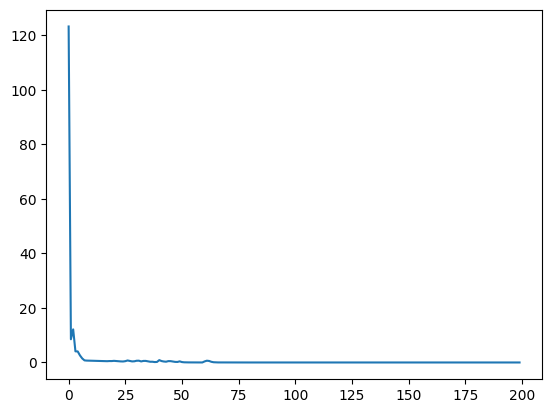

In [112]:
plt.plot(historico.history['loss']);

- Plot da acurácia que é a porcentagem de acerto

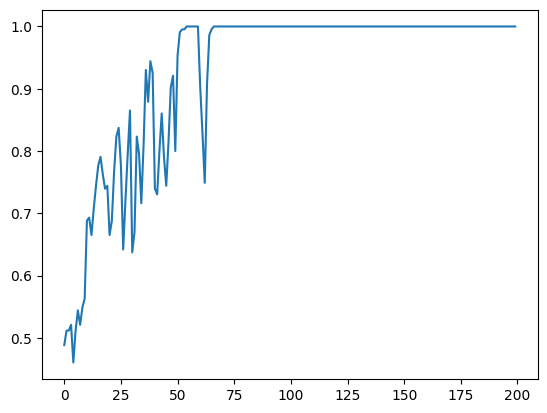

In [113]:
plt.plot(historico.history['accuracy']);

In [114]:
X_test.shape

(54, 16384)

- o predict faz a previsão da imagem de teste

In [115]:
previsao = network1.predict(X_test)
previsao

2/2 [==============================] - 0s 51ms/step


array([[9.9994636e-01],
       [1.4283404e-07],
       [9.9985313e-01],
       [9.9322248e-01],
       [1.7727043e-01],
       [9.9963039e-01],
       [9.8506541e-07],
       [9.9684661e-03],
       [7.0178986e-01],
       [5.2459855e-03],
       [9.9926746e-01],
       [1.3782654e-11],
       [7.0862412e-02],
       [2.8529722e-02],
       [9.8491353e-01],
       [9.9943668e-01],
       [9.6873903e-01],
       [7.9304695e-02],
       [9.9701184e-01],
       [9.9997473e-01],
       [9.9993306e-01],
       [3.0568728e-02],
       [9.9994218e-01],
       [9.8567080e-01],
       [9.9895060e-01],
       [2.2069812e-02],
       [9.9988812e-01],
       [9.9992615e-01],
       [9.9840534e-01],
       [6.5255864e-04],
       [9.1965562e-01],
       [7.0857493e-07],
       [2.1772396e-02],
       [9.9998993e-01],
       [2.6731217e-09],
       [9.9994880e-01],
       [5.8065200e-01],
       [9.9981606e-01],
       [9.6232420e-01],
       [9.9999177e-01],
       [8.9631521e-04],
       [1.150140

- 0 false Homer
- 1 true Bart

In [116]:
previsao = (previsao > 0.5)
previsao

array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False]])

In [117]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

- acuracy mede a probabilidade de acerto da rede neural

In [118]:
accuracy_score(y_test, previsao)

0.7407407407407407

In [119]:
cm = confusion_matrix(y_test, previsao)
cm

array([[17,  9],
       [ 5, 23]], dtype=int64)

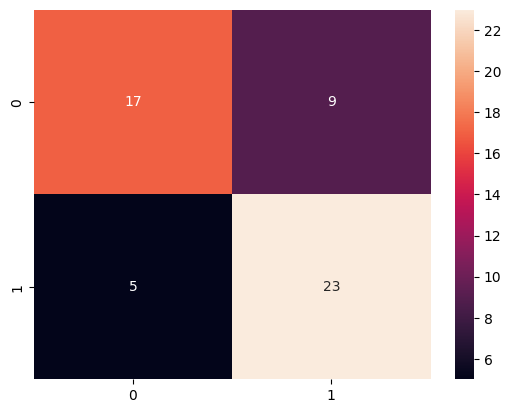

In [120]:
sns.heatmap(cm, annot=True);

In [121]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.72      0.82      0.77        28

    accuracy                           0.74        54
   macro avg       0.75      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



- Salvar e carregar o modelo treinado 

In [122]:
model_json = network1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [123]:
network1_saved = save_model(network1, "weights1.hdf5")

In [124]:
with open('model.json', 'r') as json_file:
    json_savedModel= json_file.read()
json_savedModel    

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regulariz

In [125]:
network1_loaded = tf.keras.models.model_from_json(json_savedModel)
network1_loaded.load_weights('weights1.hdf5')
network1_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [126]:
network1_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_7 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_8 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________
